In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e3/sample_submission.csv
/kaggle/input/playground-series-s3e3/train.csv
/kaggle/input/playground-series-s3e3/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data exploration
df = pd.read_csv('/kaggle/input/playground-series-s3e3/train.csv')
data = pd.DataFrame(df)
data

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


In [4]:
data.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [6]:
data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [7]:
#Grouping and visualization

BusinessTravel = data.groupby("BusinessTravel")["BusinessTravel"].count()
BusinessTravel

BusinessTravel
Non-Travel            126
Travel_Frequently     261
Travel_Rarely        1290
Name: BusinessTravel, dtype: int64

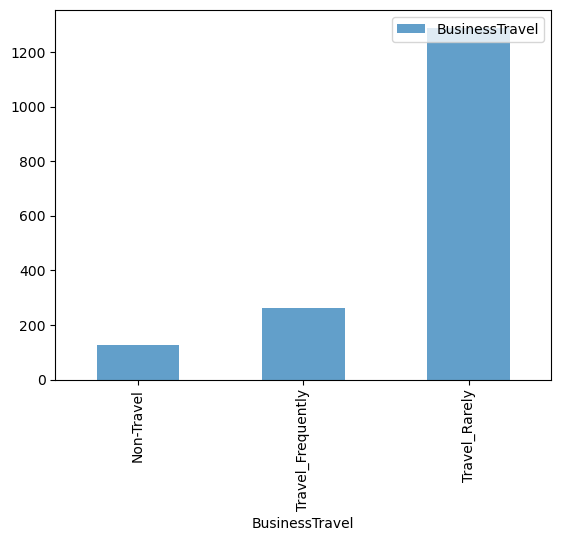

In [8]:
BusinessTravel.plot(kind = 'bar', alpha = 0.7)
plt.legend(loc = 'upper right')

In [9]:
Department = data.groupby("Department")["Department"].count()
Department

Department
Human Resources             39
Research & Development    1167
Sales                      471
Name: Department, dtype: int64

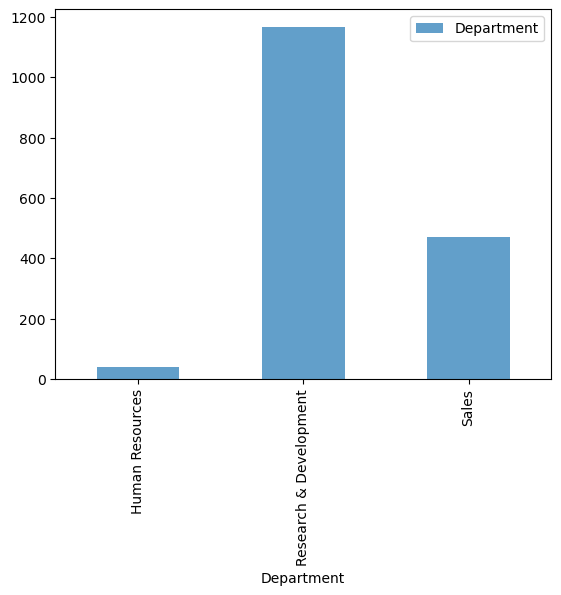

In [10]:
Department.plot(kind = "bar", alpha = 0.7)
plt.legend(loc = "upper right")

In [11]:
EducationField = data.groupby("EducationField")["EducationField"].count()
EducationField

EducationField
Human Resources      13
Life Sciences       775
Marketing           152
Medical             549
Other                82
Technical Degree    106
Name: EducationField, dtype: int64

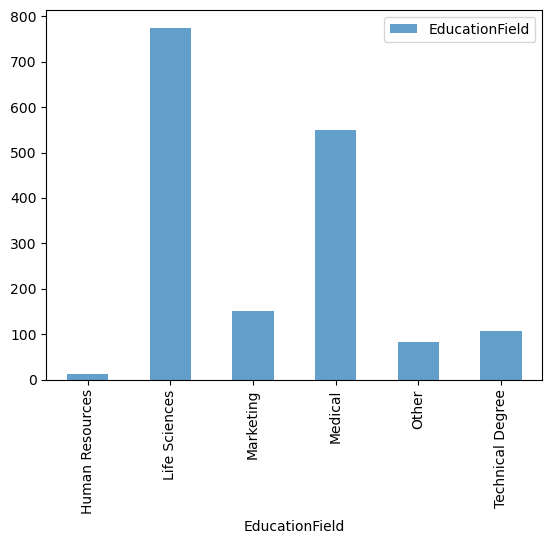

In [12]:
EducationField.plot(alpha = 0.7, kind = 'bar')
plt.legend(loc = 'upper right')

In [13]:
Gender = data.groupby("Gender")["Gender"].count()
Gender

Gender
Female     613
Male      1064
Name: Gender, dtype: int64

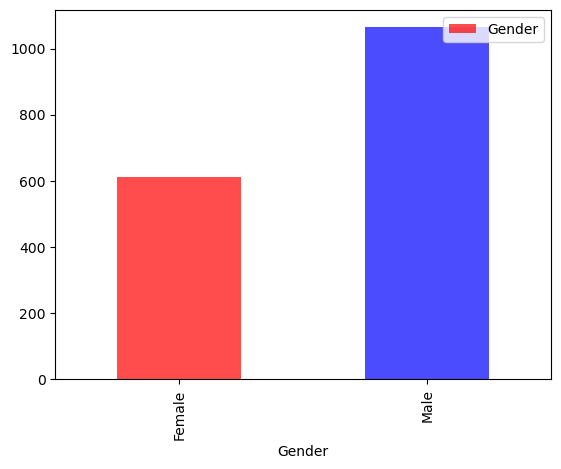

In [14]:
color = ["red", "blue"]
Gender.plot(alpha = 0.7, kind = "bar", color = color)
plt.legend(loc = "upper right")

In [15]:
JobRole = data.groupby("JobRole")["JobRole"].count()
JobRole

JobRole
Healthcare Representative    155
Human Resources               34
Laboratory Technician        334
Manager                      111
Manufacturing Director       196
Research Director             71
Research Scientist           344
Sales Executive              355
Sales Representative          77
Name: JobRole, dtype: int64

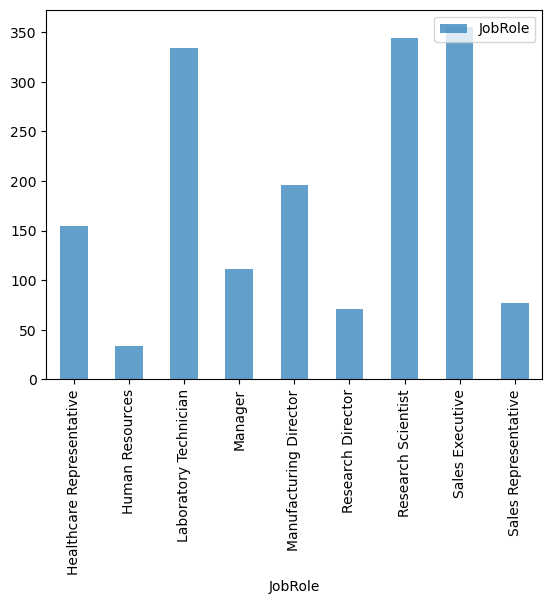

In [16]:
JobRole.plot(alpha = 0.7, kind = "bar")
plt.legend(loc = "upper right")

In [17]:
MaritalStatus = data.groupby('MaritalStatus')['MaritalStatus'].count()
MaritalStatus

MaritalStatus
Divorced    327
Married     773
Single      577
Name: MaritalStatus, dtype: int64

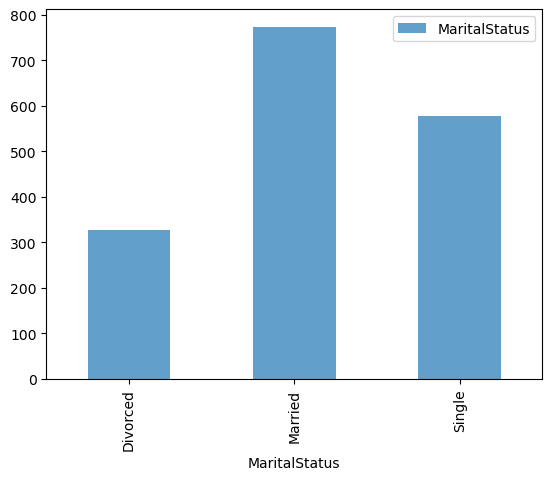

In [18]:
MaritalStatus.plot(alpha = 0.7, kind = "bar")
plt.legend(loc = "upper right")

In [19]:
OverTime = data.groupby("OverTime")["OverTime"].count()
OverTime

OverTime
No     1277
Yes     400
Name: OverTime, dtype: int64

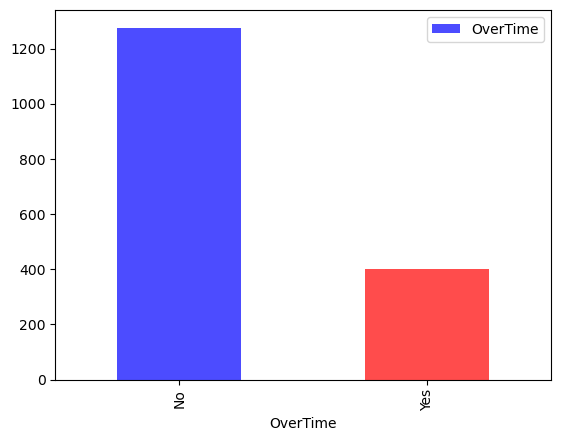

In [20]:
color = ["blue", "red"]
OverTime.plot(alpha = 0.7, kind = "bar", color = color)
plt.legend(loc = "upper right")

In [21]:
Age_DailyRate = data.groupby("Age")["DailyRate"].sum()

<AxesSubplot:xlabel='Age'>

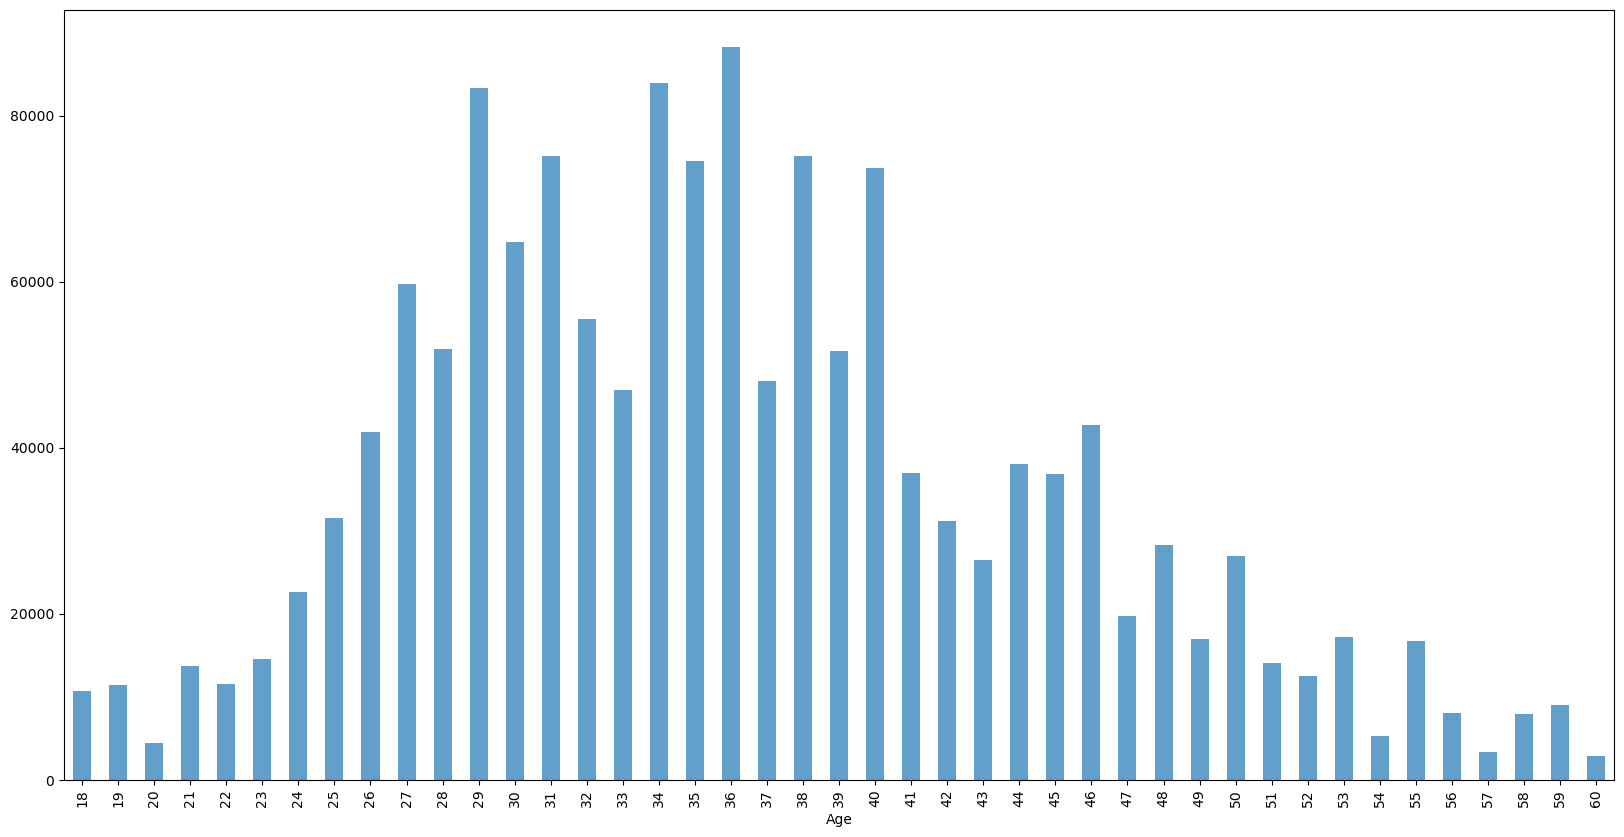

In [22]:
Age_DailyRate.plot(kind = "bar", alpha = 0.7, figsize = (20, 10))

In [23]:
data = data.drop(columns = 'id', axis = 1)
data = pd.get_dummies(data)

In [24]:
df = pd.read_csv("/kaggle/input/playground-series-s3e3/test.csv")
test = pd.DataFrame(df)
test

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2791,31,Travel_Rarely,755,Sales,1,1,Life Sciences,1,3,...,3,80,1,1,1,3,1,0,0,0
1115,2792,40,Travel_Rarely,654,Research & Development,26,5,Medical,1,3,...,4,80,1,20,4,3,20,10,1,8
1116,2793,42,Travel_Frequently,884,Research & Development,1,4,Medical,1,2,...,1,80,1,10,2,2,5,3,0,2
1117,2794,25,Travel_Frequently,1469,Sales,1,2,Technical Degree,1,3,...,4,80,1,5,2,3,4,2,1,3


In [25]:
test_id = test['id']
test = test.drop(columns = 'id', axis = 1)
test = pd.get_dummies(test)

In [26]:
#Building a forecast model and getting the result

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
x = data.drop(columns = "Attrition", axis = 1)
y = data["Attrition"]

In [28]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier(n_estimators = 30, oob_score = True, max_features = 5, max_depth = 30)
r.fit(x, y)
y_pred = r.predict(test)

In [29]:
r.score(x, y)

0.9976147883124628

In [30]:
output = pd.DataFrame({'ID': test_id, "Attrition": y_pred})
output.to_csv("sample_submission.csv", index = False)
print("YOU HAVE MADE IT TO SUCCESSFULLY SAVE YOUR SUBMISSION!")

YOU HAVE MADE IT TO SUCCESSFULLY SAVE YOUR SUBMISSION!
